In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from shapely import wkt
from PIL import Image
import warnings

#conda install geopandas
#pip install shapely


In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Text(686.625, 0.5, 'Longitud')

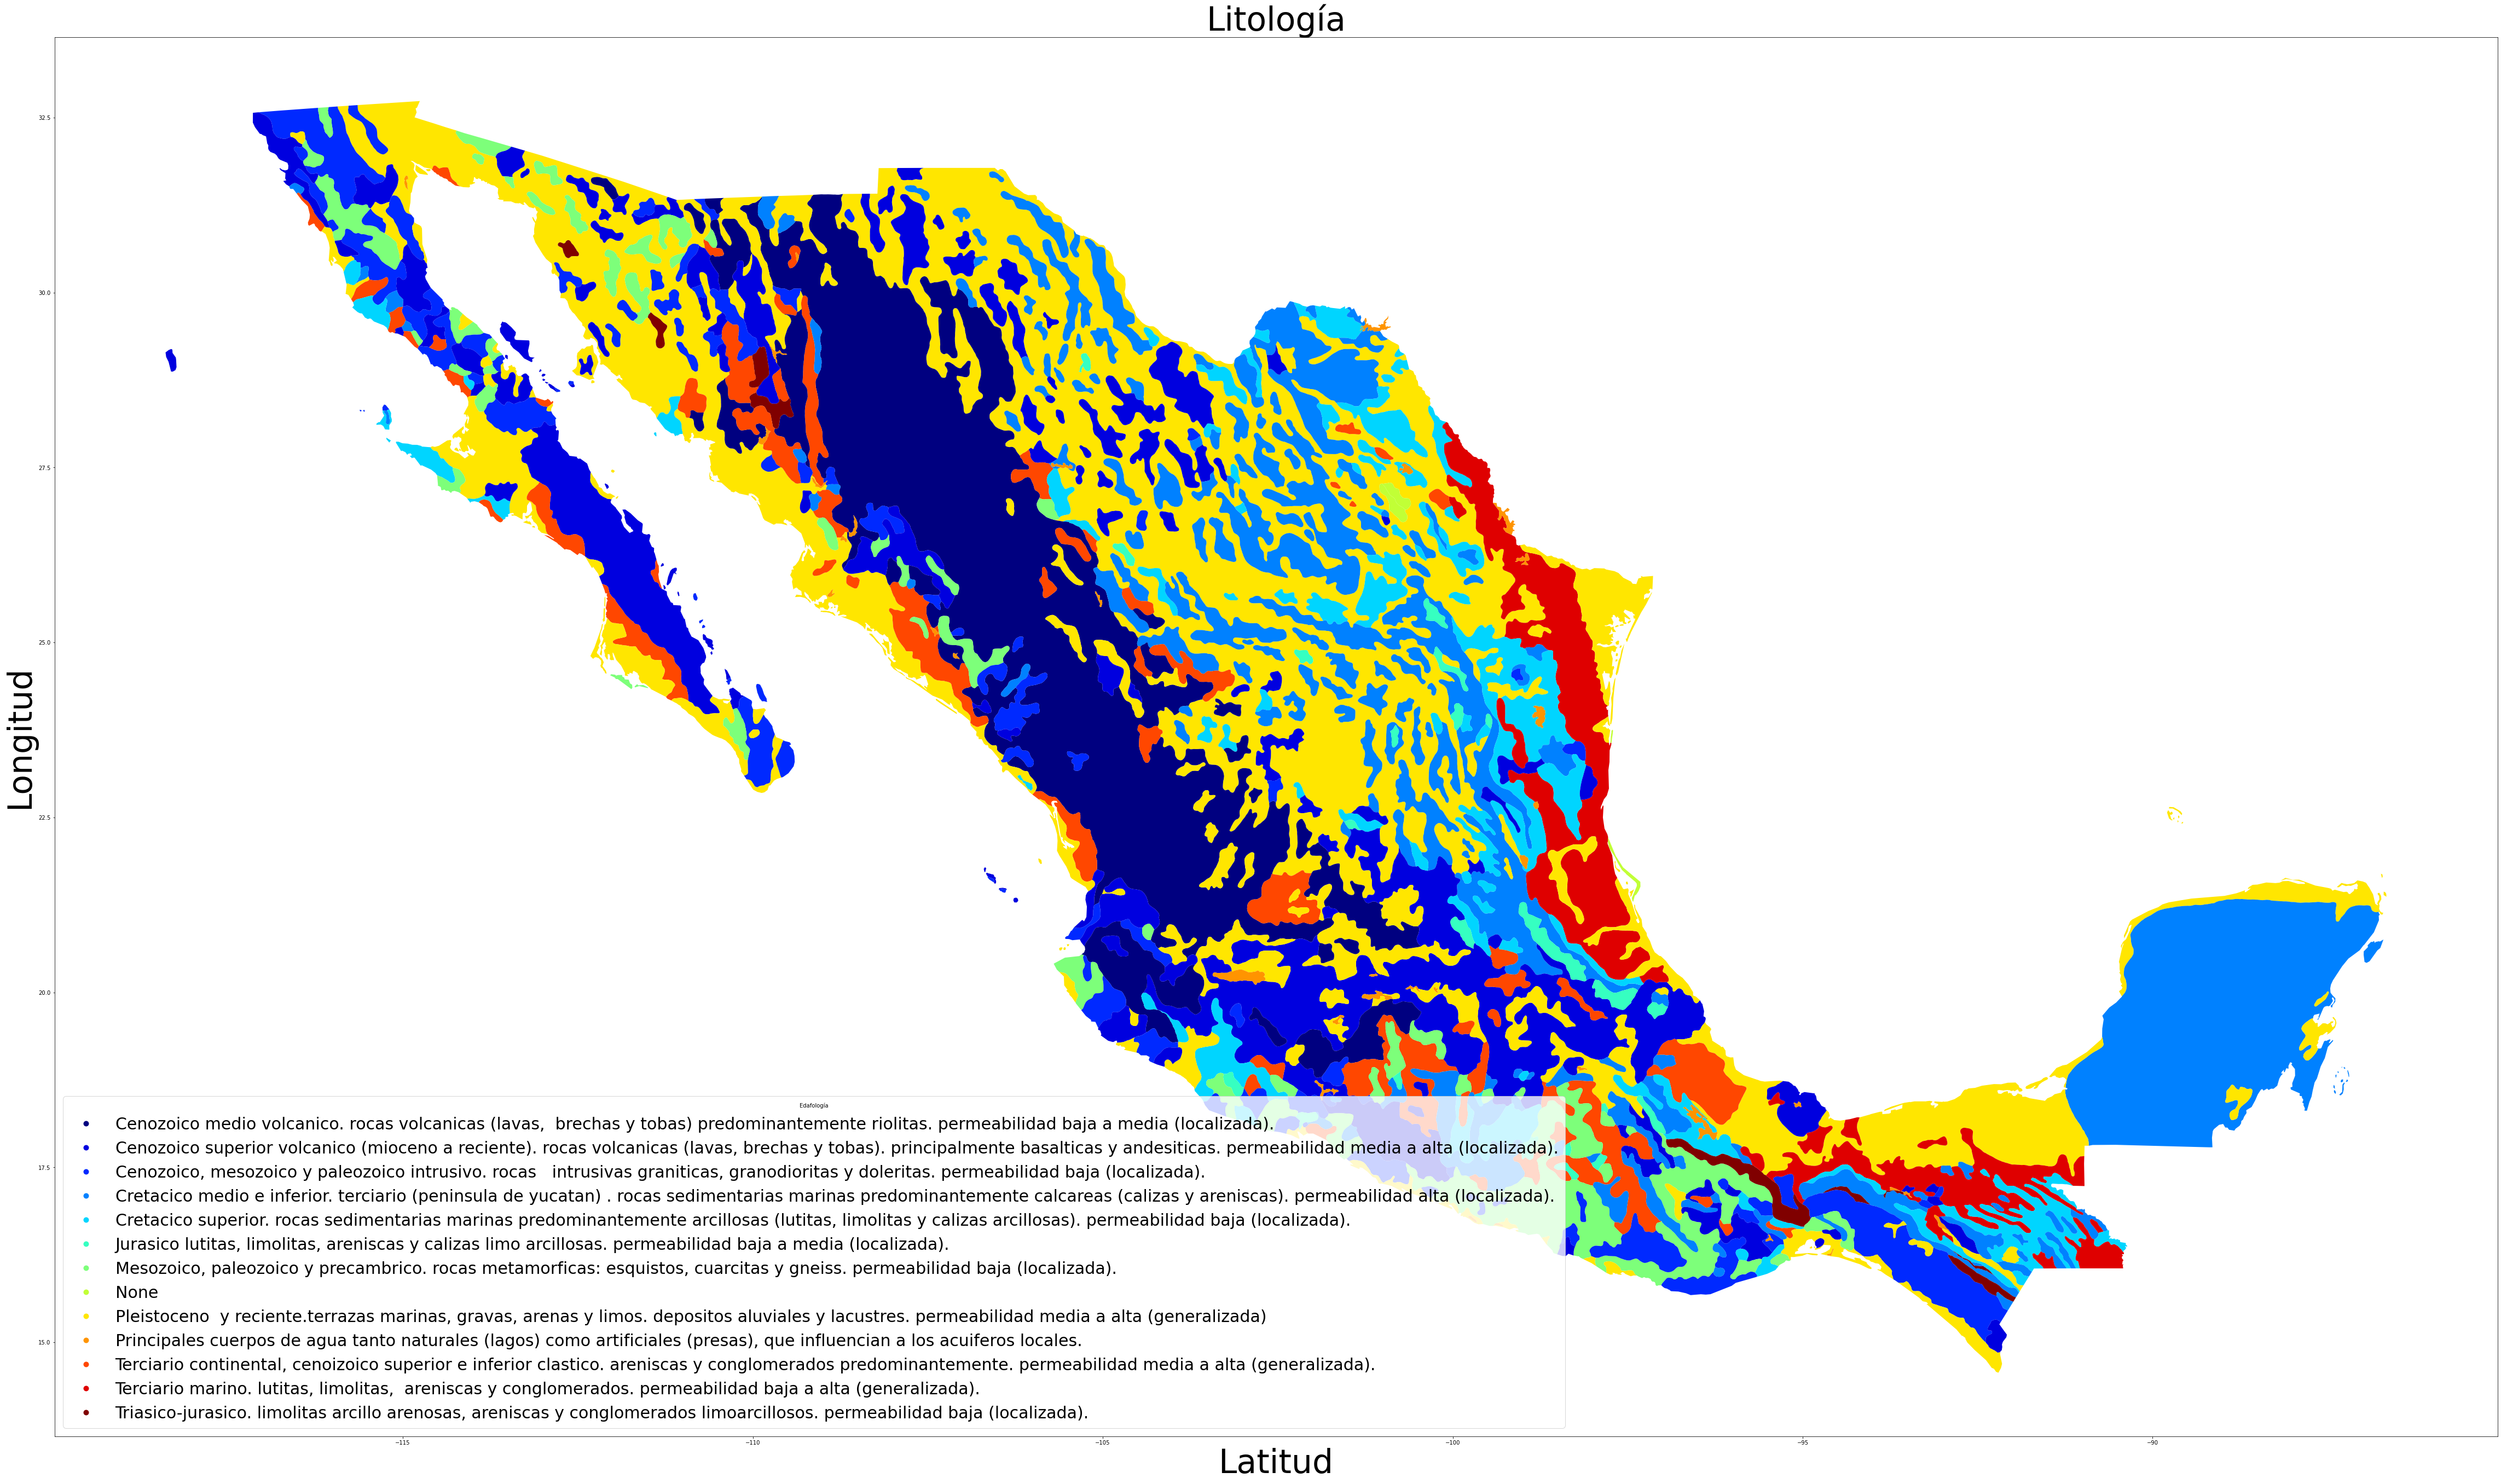

In [3]:
## Para leer el archivo con extensión .shp, se utiliza gpd.read_file y se codifica para "utf-8". 

dfl  = gpd.read_file("lito.shp",encoding = 'utf-8', legend = 'TRUE')

## En este dataset se encuentran unos carácteres que impiden el acomodo correcto para mapearlo. Entonces se recurre a una función
# para poder solucionarlo. 

def funcion(x):
    try:
        return str(x)

    except:
        return None
dfl['DESCRIPCIO']=dfl['DESCRIPCIO'].apply(funcion)

# Una manera fácil de realizar un mapa es con geopandas y poner los accesorios con matplolib.

dfl.plot(cmap = 'jet', column = 'DESCRIPCIO', legend = 'TRUE',figsize=(80,70),legend_kwds={'loc': 3, 'title': "Edafología", 'fontsize': 30})
plt.title("Litología",fontsize = 60)
plt.xlabel("Latitud",fontsize = 60)
plt.ylabel("Longitud",fontsize = 60)




In [3]:
dfl.head()

AREA  PERIMETER  COV_  COV_ID  VALOR  \
0  8.833812  84.606189     2       4      1   
1  0.104680   1.966287     3       5      6   
2  0.878520   7.179844     4       2      6   
3  0.053934   1.102182     5       3     11   
4  0.364550   5.824343     6       1      4   

                                          DESCRIPCIO  \
0  Pleistoceno  y reciente.terrazas marinas, grav...   
1  Cenozoico, mesozoico y paleozoico intrusivo. r...   
2  Cenozoico, mesozoico y paleozoico intrusivo. r...   
3  Mesozoico, paleozoico y precambrico. rocas met...   
4  Cenozoico superior volcanico (mioceno a recien...   

                                            geometry  
0  POLYGON ((-115.93267 32.65932, -115.77483 32.6...  
1  POLYGON ((-115.77483 32.67019, -115.64596 32.6...  
2  POLYGON ((-116.06043 32.65042, -115.93267 32.6...  
3  POLYGON ((-116.20963 32.63990, -116.06043 32.6...  
4  POLYGON ((-117.14195 32.56881, -117.08775 32.5...

Text(101.625, 0.5, 'Latitud')

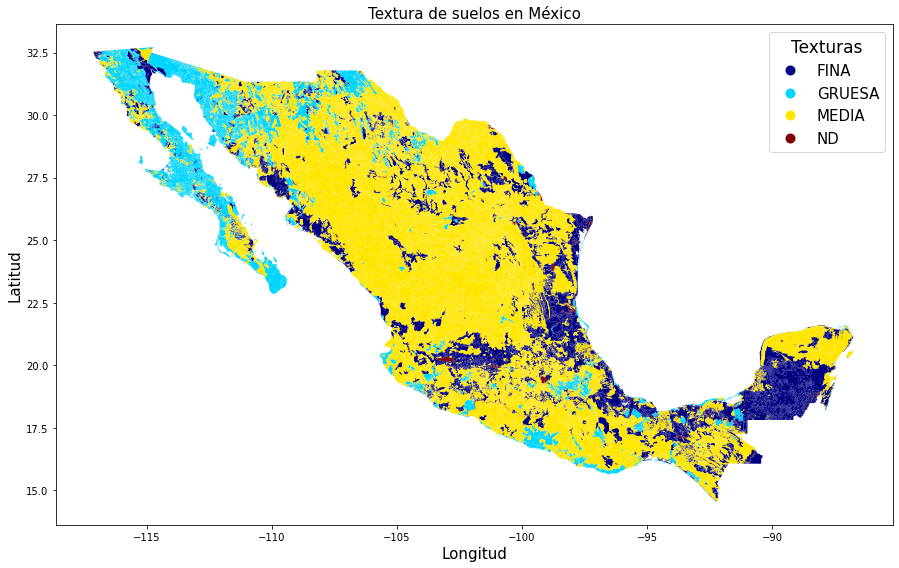

In [4]:
dfe = gpd.read_file("eda.shp",encoding = 'utf-8')
dfe.head()
dfe.plot(column = 'DESC_TEX',cmap = 'jet', legend = 'TRUE',legend_kwds={'loc': 0, 'title': "Texturas", 'fontsize': 15, 'title_fontsize': 17},figsize = (15,20))
plt.title("Textura de suelos en México",fontsize = 15)
plt.xlabel('Longitud',fontsize = 15)
plt.ylabel('Latitud',fontsize = 15)

Text(-115, 16, 'Fuente: CONABIO,1995')

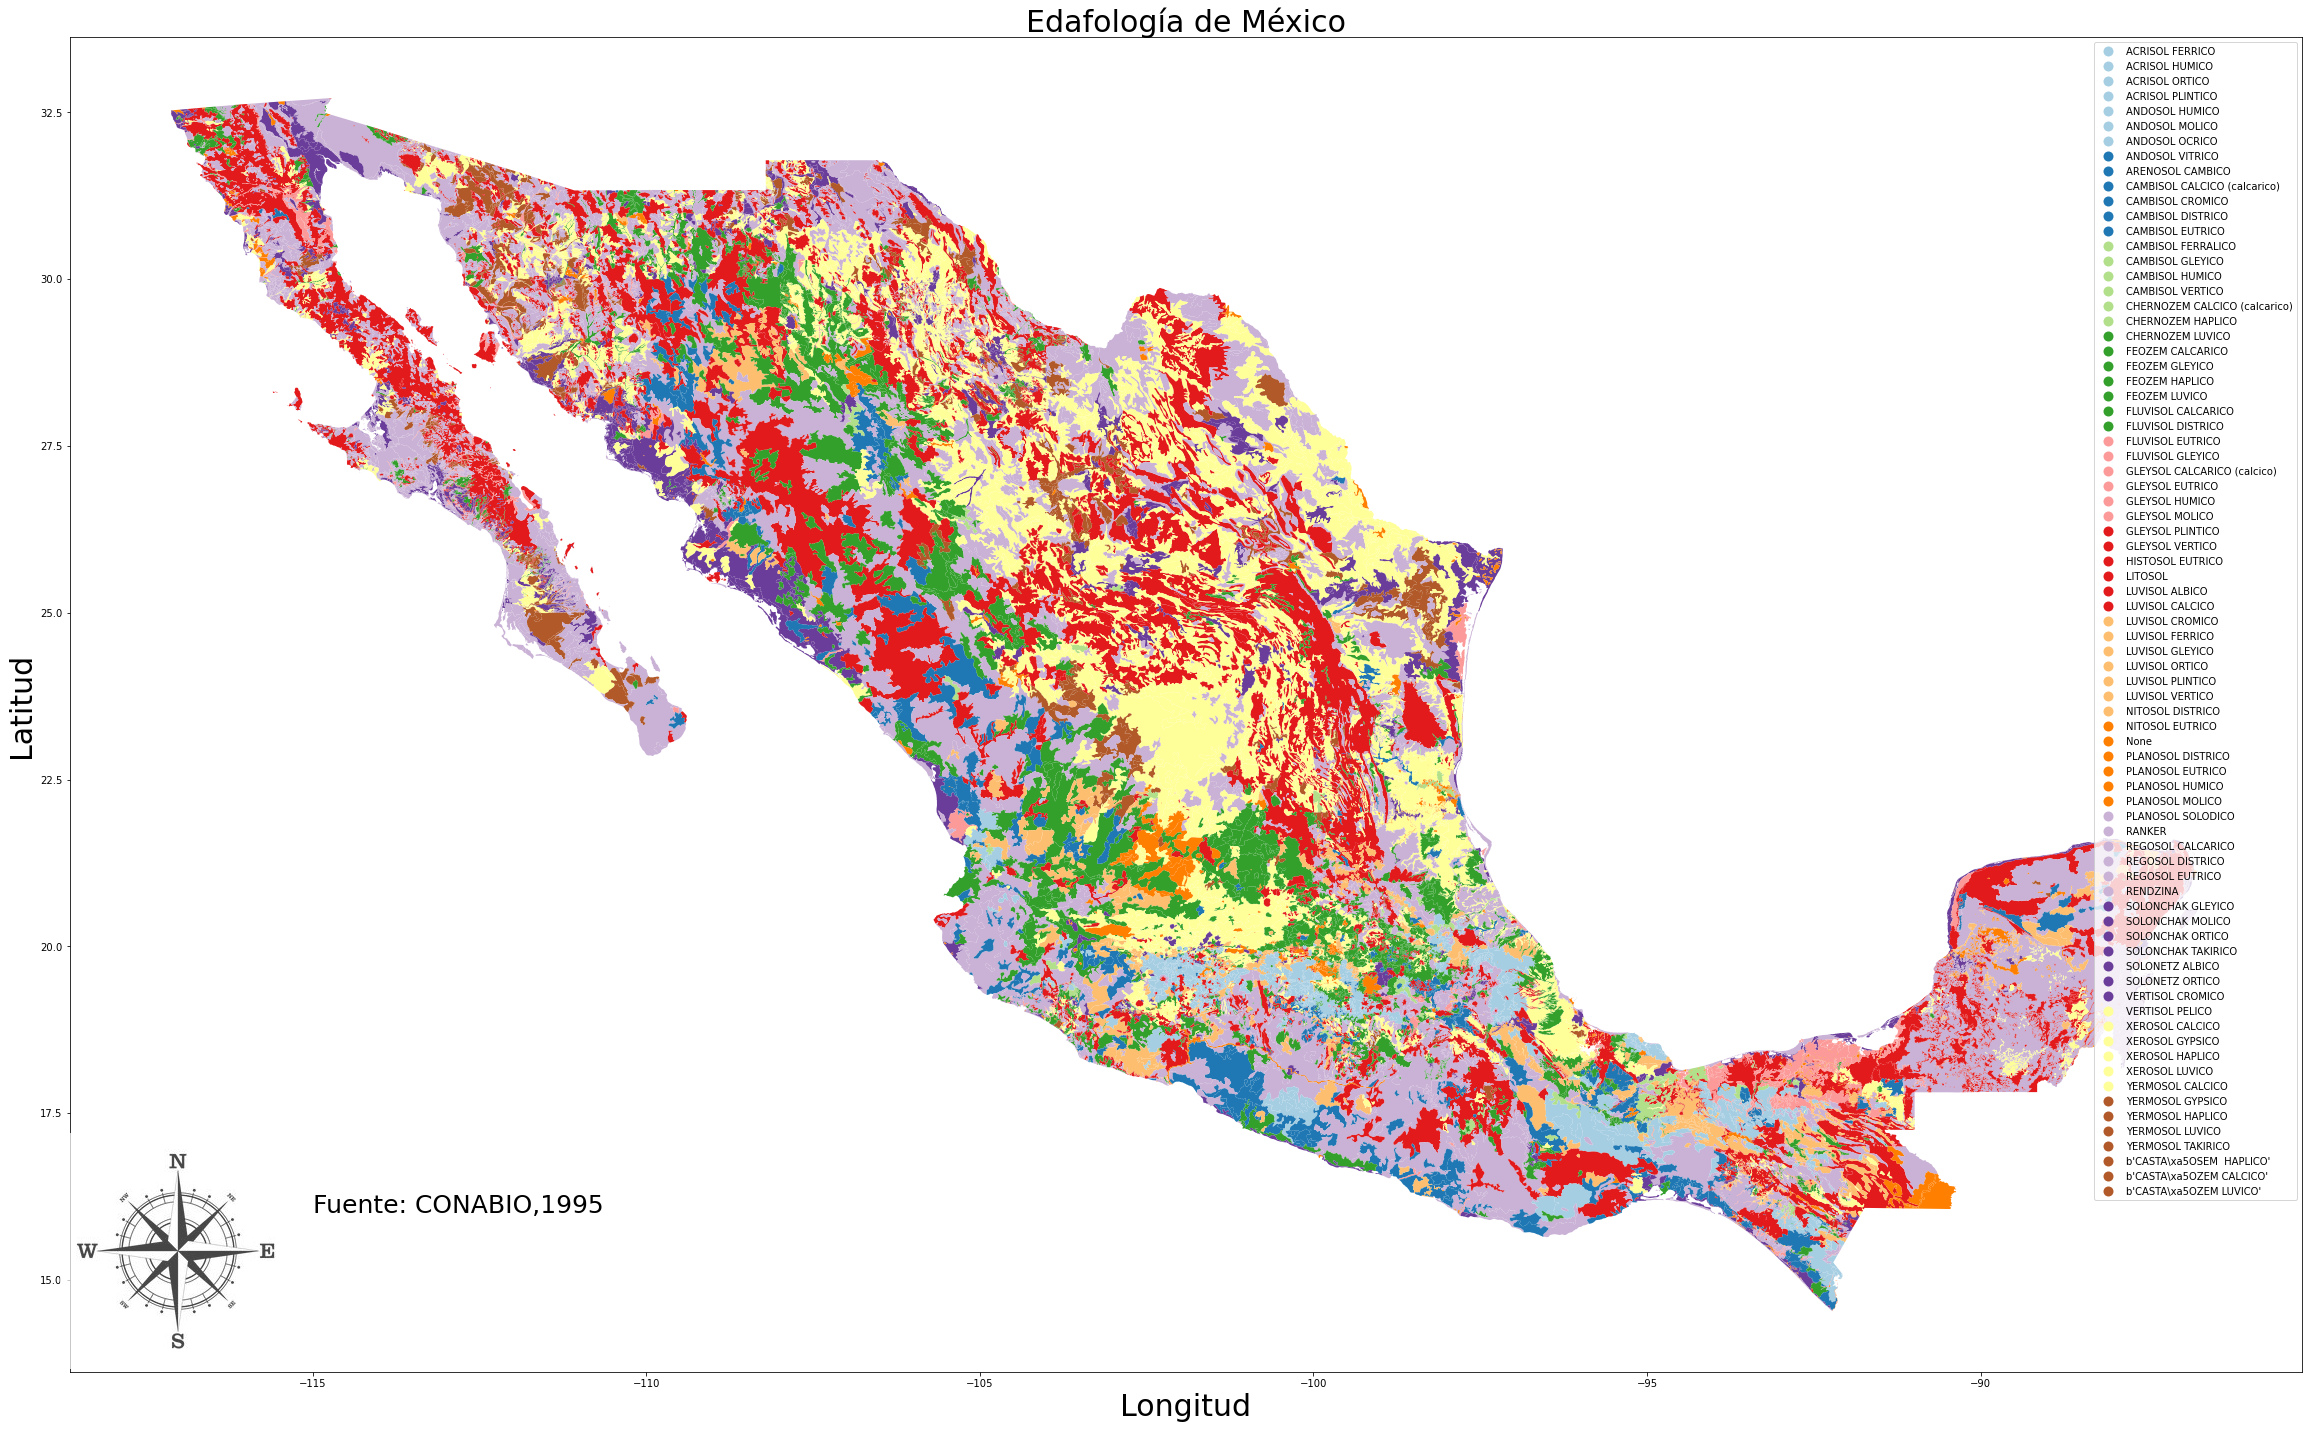

In [7]:
dfe = gpd.read_file("eda.shp",encoding = 'utf-8')
## dfe.dropna(inplace= True), encoding significa transformar la información a otro sistema 
## o forma.
    
dfe['DESCRIPCIO']=dfe['DESCRIPCIO'].apply(funcion)


dfe.plot(cmap = 'Paired',column = 'DESCRIPCIO',legend = "TRUE",figsize=(40,70),legend_kwds={'loc': 0, 'fontsize': 10})
plt.title("Edafología de México",fontsize = 30)
plt.xlabel('Longitud',fontsize = 30)
plt.ylabel('Latitud', fontsize = 30)

## plt.text(-115, 15,"Etiqueta")
im =  Image.open("rose.jpg")
plt.figimage(im, 60,60,70,origin ='upper')
plt.annotate("Fuente: CONABIO,1995", (-115,16),fontsize = 25)


Text(0, 0.5, 'Tipos de suelo')

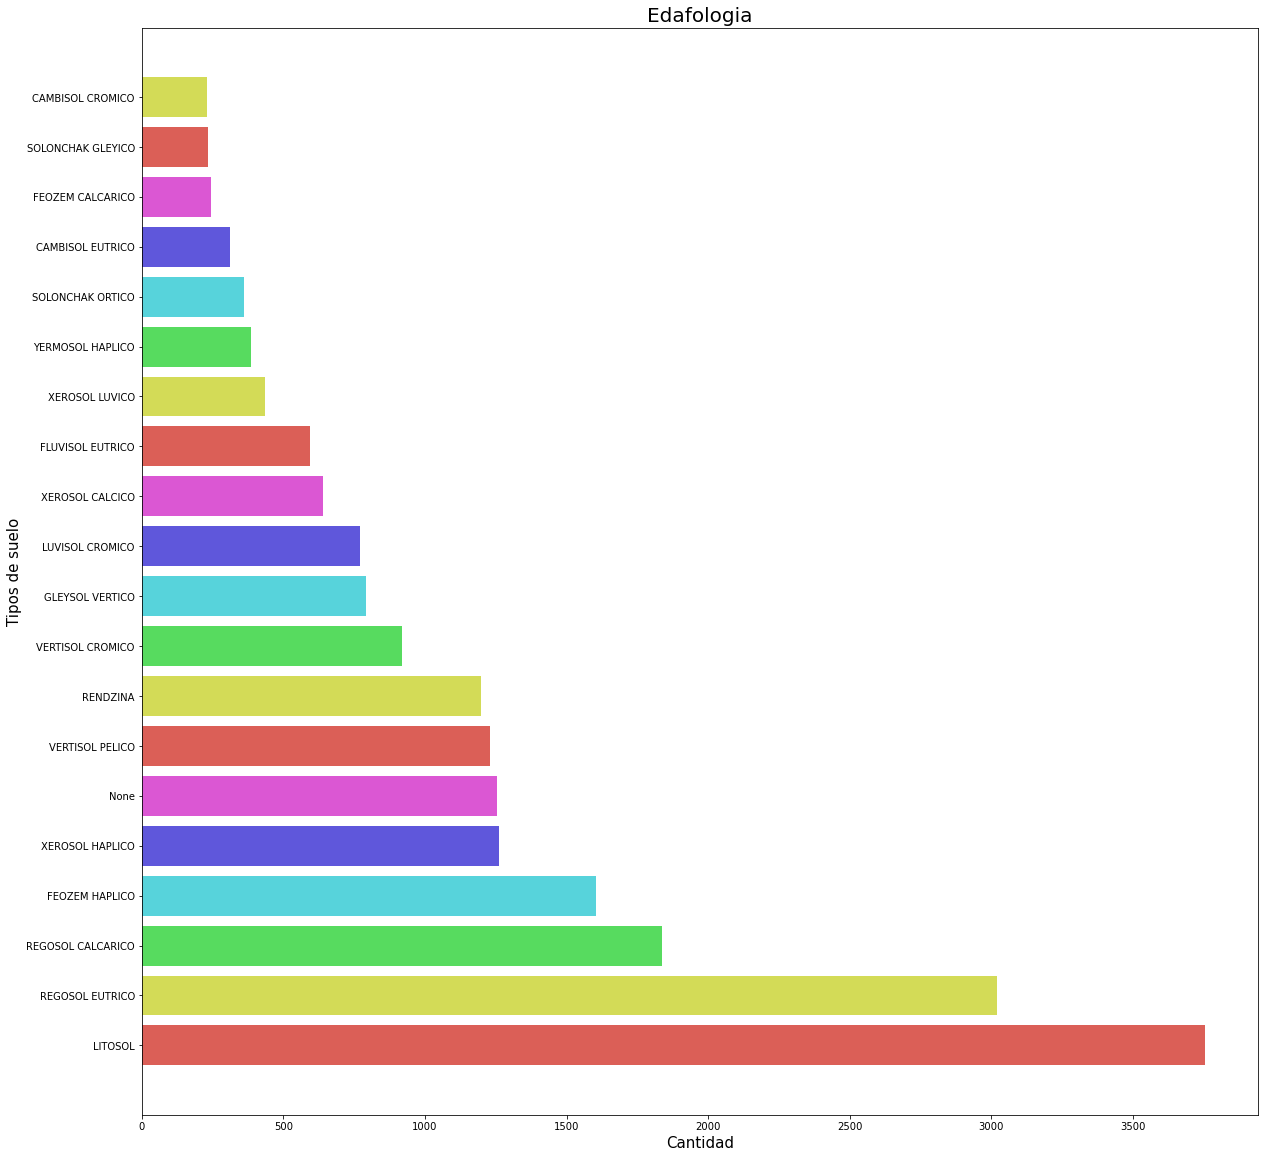

In [21]:
## La información se puede complementar con otro tipo de visualización. 

valor_eda = dfe.DESCRIPCIO.value_counts()
eda = pd.DataFrame(valor_eda)
eda_2 = eda.iloc[0:20]


plt.figure(figsize = (20,20))
plt.barh(eda_2.index,eda_2.DESCRIPCIO,color= sns.color_palette("hls"))
plt.title("Edafologia",fontsize = 20)
plt.xlabel("Cantidad", fontsize = 15)
plt.ylabel("Tipos de suelo",fontsize = 15)

In [22]:
dfe.head()

AREA  PERIMETER  COV_  COV_ID SUE1  TEX  FASFIS  FASQUIM OBSERVACIO  \
0  0.000258   0.089780     2       1    I    1       0        0       None   
1  0.029932   1.378859     3       2   Re    1       0        0       None   
2  0.173419   4.672849     4       3   Rc    2       0        5       None   
3  0.001821   0.303193     5       4   Vc    3       0        0       None   
4  0.004151   0.312451     6       5   IC    0       9        0    poblado   

          DESCRIPCIO DESC_TEX    DESC_FASFI     DESC_FAQUI  \
0            LITOSOL   GRUESA            ND             ND   
1    REGOSOL EUTRICO   GRUESA            ND             ND   
2  REGOSOL CALCARICO    MEDIA            ND  SALINA SODICA   
3   VERTISOL CROMICO     FINA            ND             ND   
4               None       ND  PETROCALCICA             ND   

                                            geometry  
0  POLYGON ((-114.75709 32.71366, -114.72049 32.7...  
1  POLYGON ((-114.75199 32.70363, -114.75519 32.7...  
2  POLYGON ((-114.72629 32.70524, -114.72859 32.7...  
3  POLYGON ((-114.88829 32.66793, -114.88529 32.6...  
4  POLYGON ((-115.51851 32.66126, -115.41581 32.6...

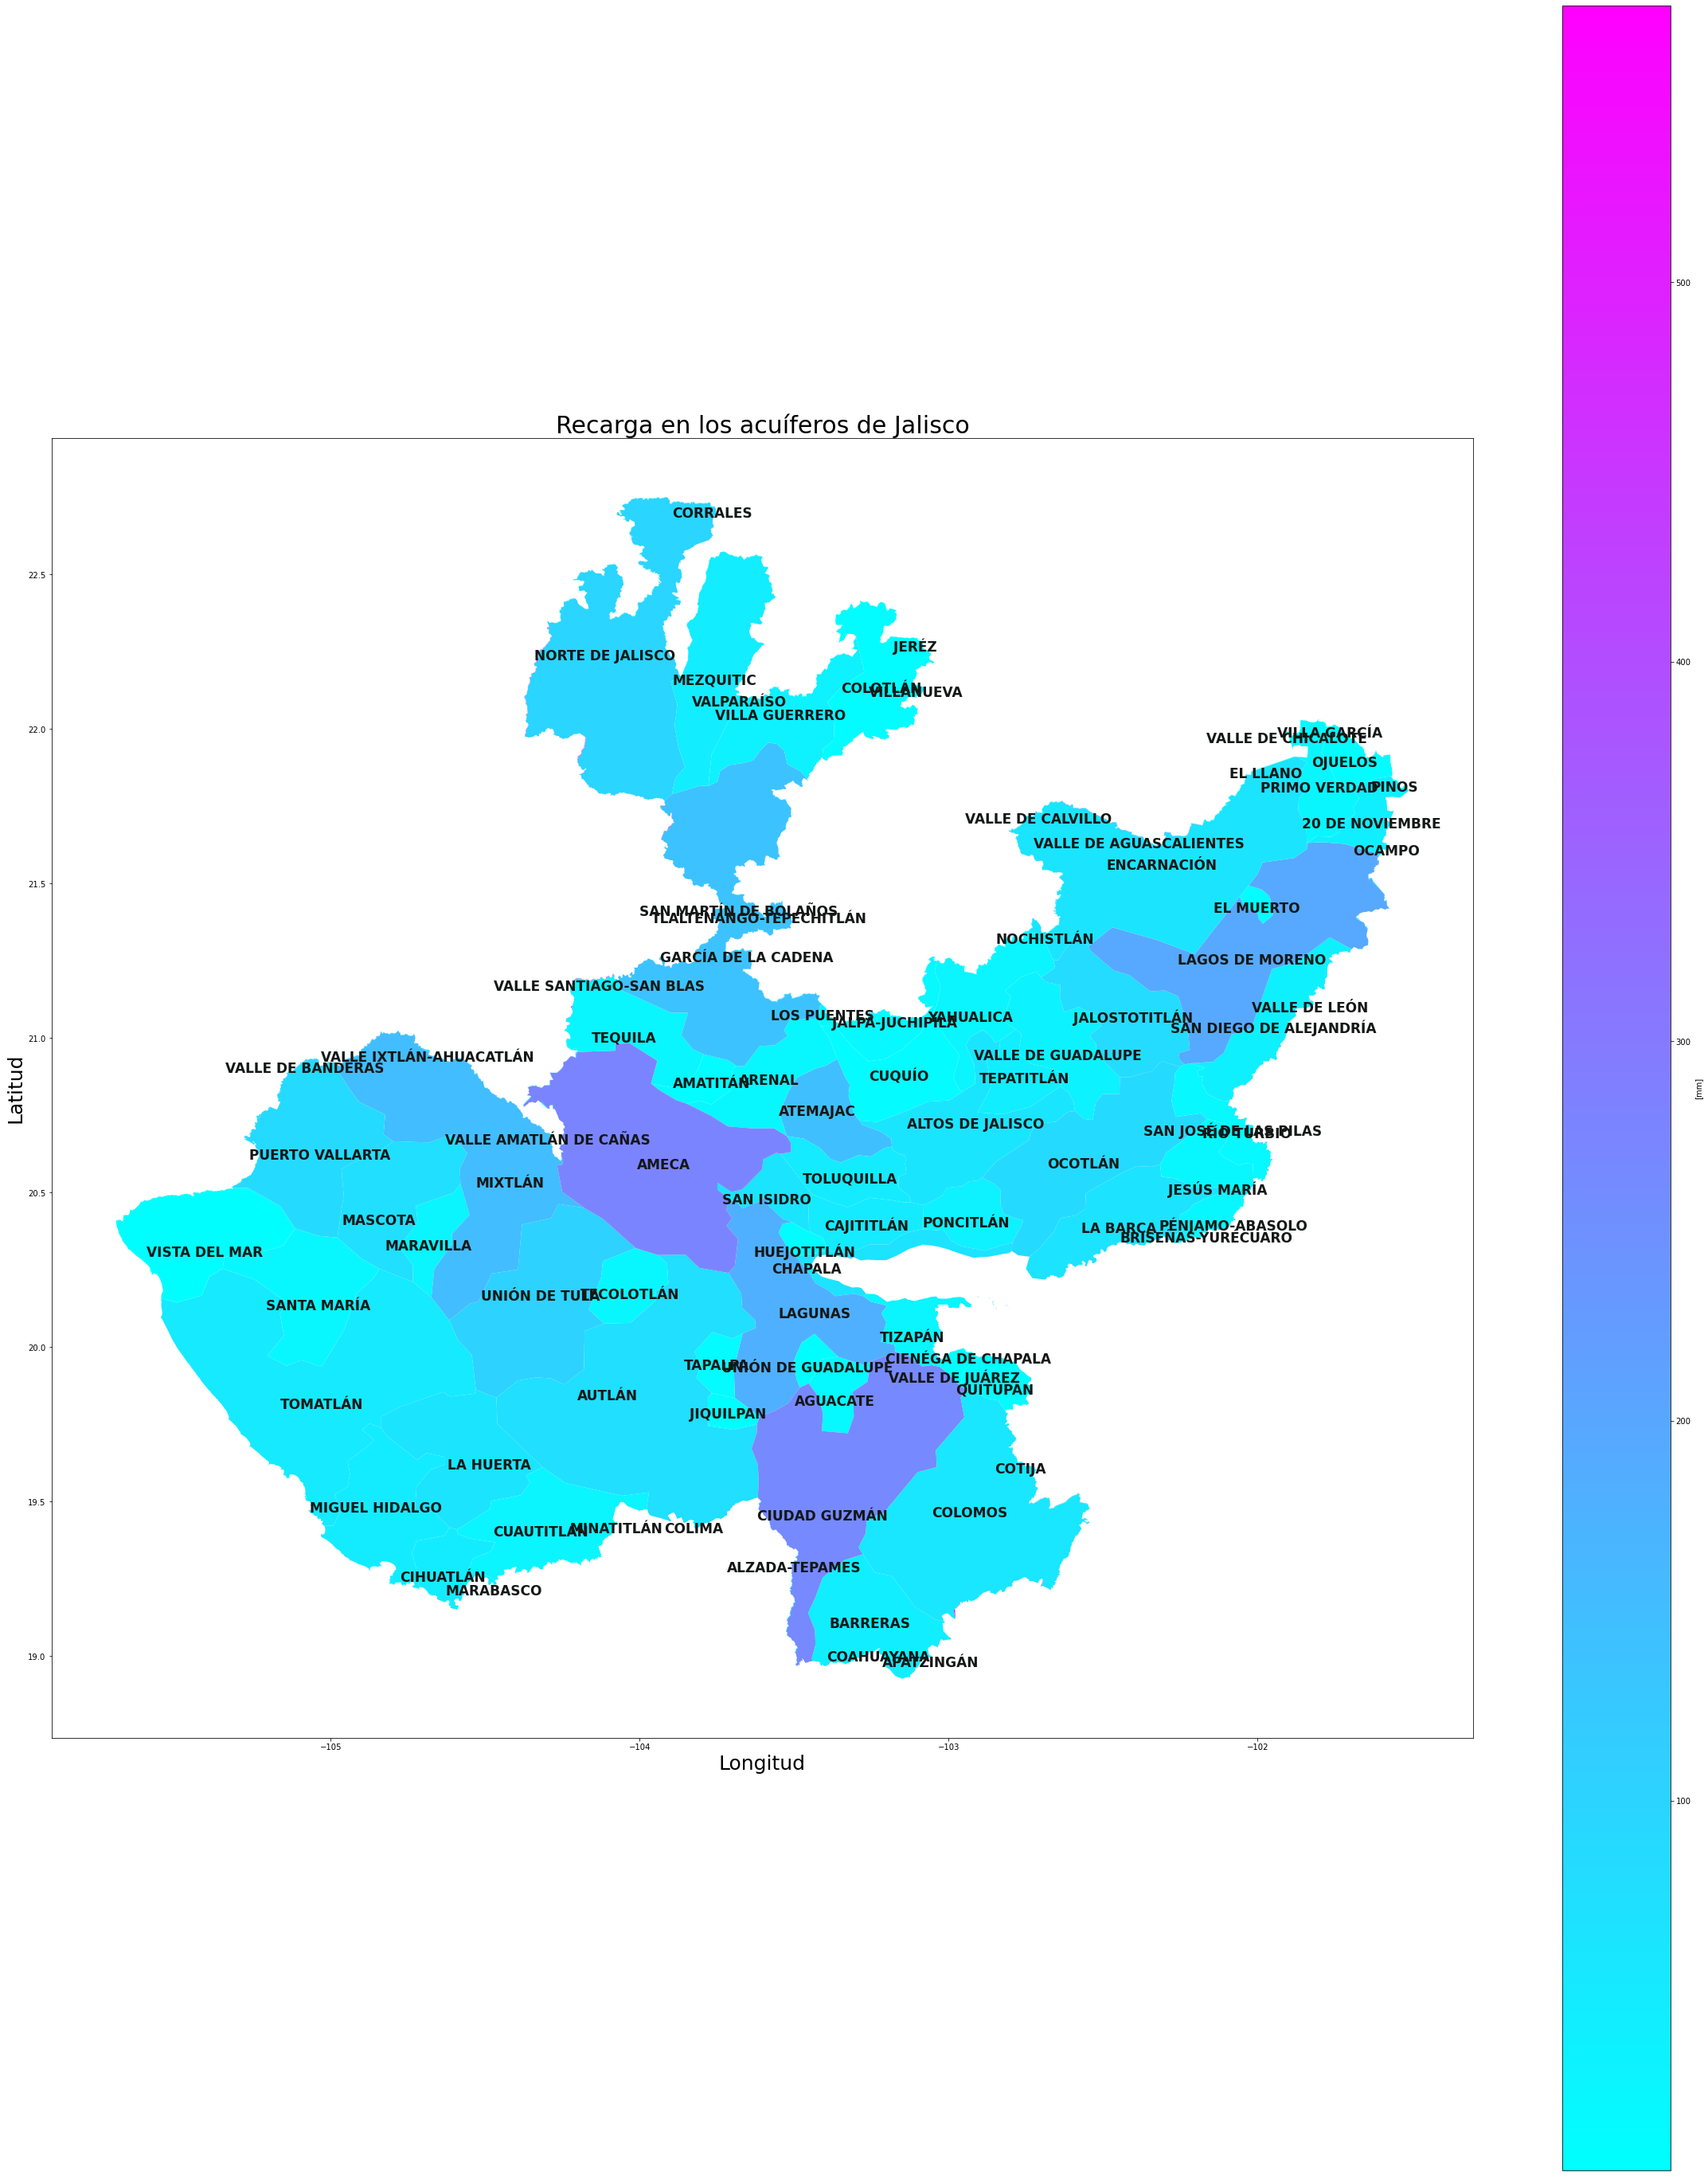

In [23]:
df = gpd.read_file("recarga_jalisco.shp",encoding='utf-8')
df.plot(cmap = 'cool', column = 'RECARGA', legend = 'TRUE',figsize= (40,50), legend_kwds = {'label': '[mm]'})


plt.rc('legend',fontsize = 30)
plt.title("Recarga en los acuíferos de Jalisco",fontsize = 30)
plt.xlabel('Longitud', fontsize = 25)
plt.ylabel('Latitud',fontsize = 25)

## colores en ascii https://htmlcolorcodes.com/es/

df['coord'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coord'] = [coords[0] for coords in df['coord']]
for idx, row in df.iterrows():
    plt.annotate(s=row['ACUÍFERO'], xy=row['coord'],horizontalalignment = 'center',va = 'top',color='#141716',size = 17,weight='bold' )


# to_crs(epsg= xx) convertir unas coordenadas a otro tipo por ejemplo a UTF-31U

In [24]:
df.head()

OBJECTID_1  OBJECTID  NUM_SEC CLV_EDO    NOM_EDO CLV_REGION  \
0           1        12       12      32  ZACATECAS          8   
1           2        13       13      32  ZACATECAS          8   
2           3        14       14      32  ZACATECAS          8   
3           4        23       23      32  ZACATECAS          8   
4           5        24       24      32  ZACATECAS          8   

                NOM_REGION  AREA_KM2 CLAVE_SIGM         ACUÍFERO  ...  \
0  LERMA-SANTIAGO-PACIFICO   4937.98       3203         CORRALES  ...   
1  LERMA-SANTIAGO-PACIFICO    305.19       3213     VILLA GARCÍA  ...   
2  LERMA-SANTIAGO-PACIFICO   4321.75       3204       VALPARAÍSO  ...   
3  LERMA-SANTIAGO-PACIFICO    833.71       3208       NOCHISTLÁN  ...   
4  LERMA-SANTIAGO-PACIFICO   4069.04       3209  JALPA-JUCHIPILA  ...   

   RECARGA  DNC  VEXT  VCASJUN14      CDISPJUN14     SOBREXP14 Shape_Leng  \
0     28.1  5.0   2.0   1.040358  DISPONIBILIDAD  SUBEXPLOTADO   2.818570   
1     15.5  2.2  10.3   7.126318  DISPONIBILIDAD  SUBEXPLOTADO   0.110598   
2     26.0  1.4  14.6  18.410379  DISPONIBILIDAD  SUBEXPLOTADO   3.199620   
3     23.2  8.8   4.8   6.207392  DISPONIBILIDAD  SUBEXPLOTADO   1.885301   
4     72.9  9.9  38.3  58.436577  DISPONIBILIDAD  SUBEXPLOTADO   1.305738   

  Shape_Area                                           geometry  \
0   0.001147  MULTIPOLYGON (((-104.09587 22.35593, -104.0957...   
1   0.000040  MULTIPOLYGON (((-101.77494 22.00702, -101.7773...   
2   0.001164  MULTIPOLYGON (((-103.62198 22.10013, -103.6218...   
3   0.000902  MULTIPOLYGON (((-102.91473 21.20749, -102.9110...   
4   0.000560  MULTIPOLYGON (((-103.13180 21.05541, -103.1314...   

                                       coord  
0  (-103.76442286970936, 22.719954689657243)  
1   (-101.76546836624217, 22.00830008977738)  
2   (-103.67659561206088, 22.10876471936635)  
3   (-102.68836918616748, 21.34279055573961)  
4  (-103.17344793804457, 21.071855955088296)  

[5 rows x 22 columns]

In [25]:
temperatura = pd.read_csv("Temp-anual.csv") 
temperatura.head()



FID  id_punto  agno  \
0  temp_anual_espacial_p.fid--1205f935_172ddc4527...     38783  2010   
1  temp_anual_espacial_p.fid--1205f935_172ddc4527...     38783  2011   
2  temp_anual_espacial_p.fid--1205f935_172ddc4527...     38783  2012   
3  temp_anual_espacial_p.fid--1205f935_172ddc4527...     38783  2013   
4  temp_anual_espacial_p.fid--1205f935_172ddc4527...     38783  2014   

   temp_anual                                           geom  
0       14.27  POINT (-12996550.550114691 3796171.935018617)  
1       14.65  POINT (-12996550.550114691 3796171.935018617)  
2       15.01  POINT (-12996550.550114691 3796171.935018617)  
3       16.78  POINT (-12996550.550114691 3796171.935018617)  
4       18.67  POINT (-12996550.550114691 3796171.935018617)

In [26]:
año_1  = []
for i in temperatura["agno"]:
      if  i == 2010: 
        año_1.append(i)

cuenta = str(año_1)
len(año_1)

segundo_agno = temperatura[temperatura.agno==2011]
tercer_agno = temperatura[temperatura.agno==2012]
cuarto_agno = temperatura[temperatura.agno==2013]


Text(0.5, 1.0, 'Temperatura promedio en México')

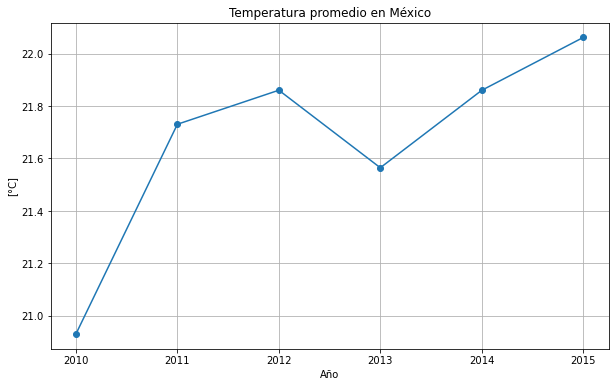

In [27]:
mean_temp = temperatura.groupby("agno").mean().temp_anual
plt.figure(figsize = (10,6))
plt.plot(mean_temp,marker = "o")
plt.grid()
plt.xlabel("Año")
plt.ylabel("[°C]")
plt.title('Temperatura promedio en México')

In [ ]:
temperatura["agno"].count()

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

AttributeError: 'GeoDataFrame' object has no attribute 'annotate'

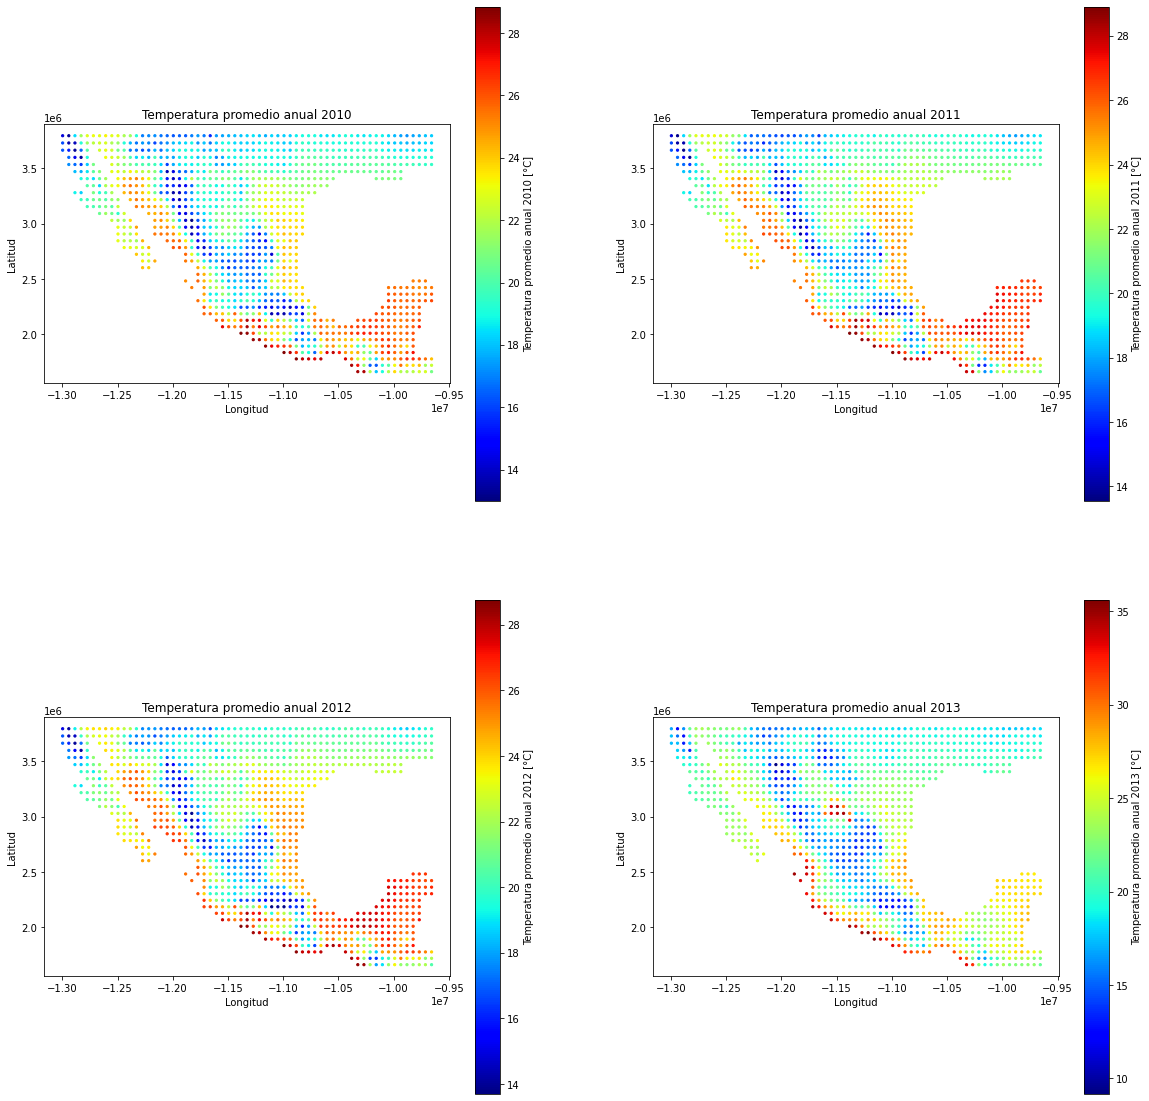

In [28]:
temperatura.sort_values('agno', inplace=True)

primer_agno= temperatura[0:1162]

primer_agno['geom'] = primer_agno['geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(primer_agno,geometry=primer_agno.geom)

segundo_agno['geom'] = segundo_agno['geom'].apply(wkt.loads)
gdf2 = gpd.GeoDataFrame(segundo_agno,geometry=segundo_agno.geom)

tercer_agno['geom'] = tercer_agno['geom'].apply(wkt.loads)
gdf3 = gpd.GeoDataFrame(tercer_agno,geometry=tercer_agno.geom)

cuarto_agno['geom'] = cuarto_agno['geom'].apply(wkt.loads)
gdf4 = gpd.GeoDataFrame(cuarto_agno,geometry=cuarto_agno.geom)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax1 =gdf.plot(cmap = 'jet',ax=axes[0][0], column = 'temp_anual',legend='TRUE',markersize=5,legend_kwds = {'label':'Temperatura promedio anual 2010 [°C]'})
ax2 = gdf2.plot(cmap = 'jet',ax=axes[0][1], column = 'temp_anual',legend='TRUE',markersize=5,legend_kwds = {'label':'Temperatura promedio anual 2011 [°C]'})
ax3 = gdf3.plot(cmap = 'jet',ax=axes[1][0], column = 'temp_anual',legend='TRUE',markersize=5,legend_kwds = {'label':'Temperatura promedio anual 2012 [°C]'})
ax4=gdf4.plot(cmap = 'jet',ax=axes[1][1], column = 'temp_anual',legend='TRUE',markersize=5,legend_kwds = {'label':'Temperatura promedio anual 2013 [°C]'})


ax1.set_title("Temperatura promedio anual 2010")
ax2.set_title("Temperatura promedio anual 2011")
ax3.set_title("Temperatura promedio anual 2012")
ax4.set_title("Temperatura promedio anual 2013")
ax1.set_xlabel("Longitud")
ax2.set_xlabel("Longitud")
ax3.set_xlabel("Longitud")
ax4.set_xlabel("Longitud")

ax1.set_ylabel("Latitud")
ax2.set_ylabel("Latitud")
ax3.set_ylabel("Latitud")
ax4.set_ylabel("Latitud")
#plt.annotate("Fuente: CONABIO,1990",xy=(0.1, 0.1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')



